
# 🌳 Decision Tree & Random Forest

# 1. Decision Tree

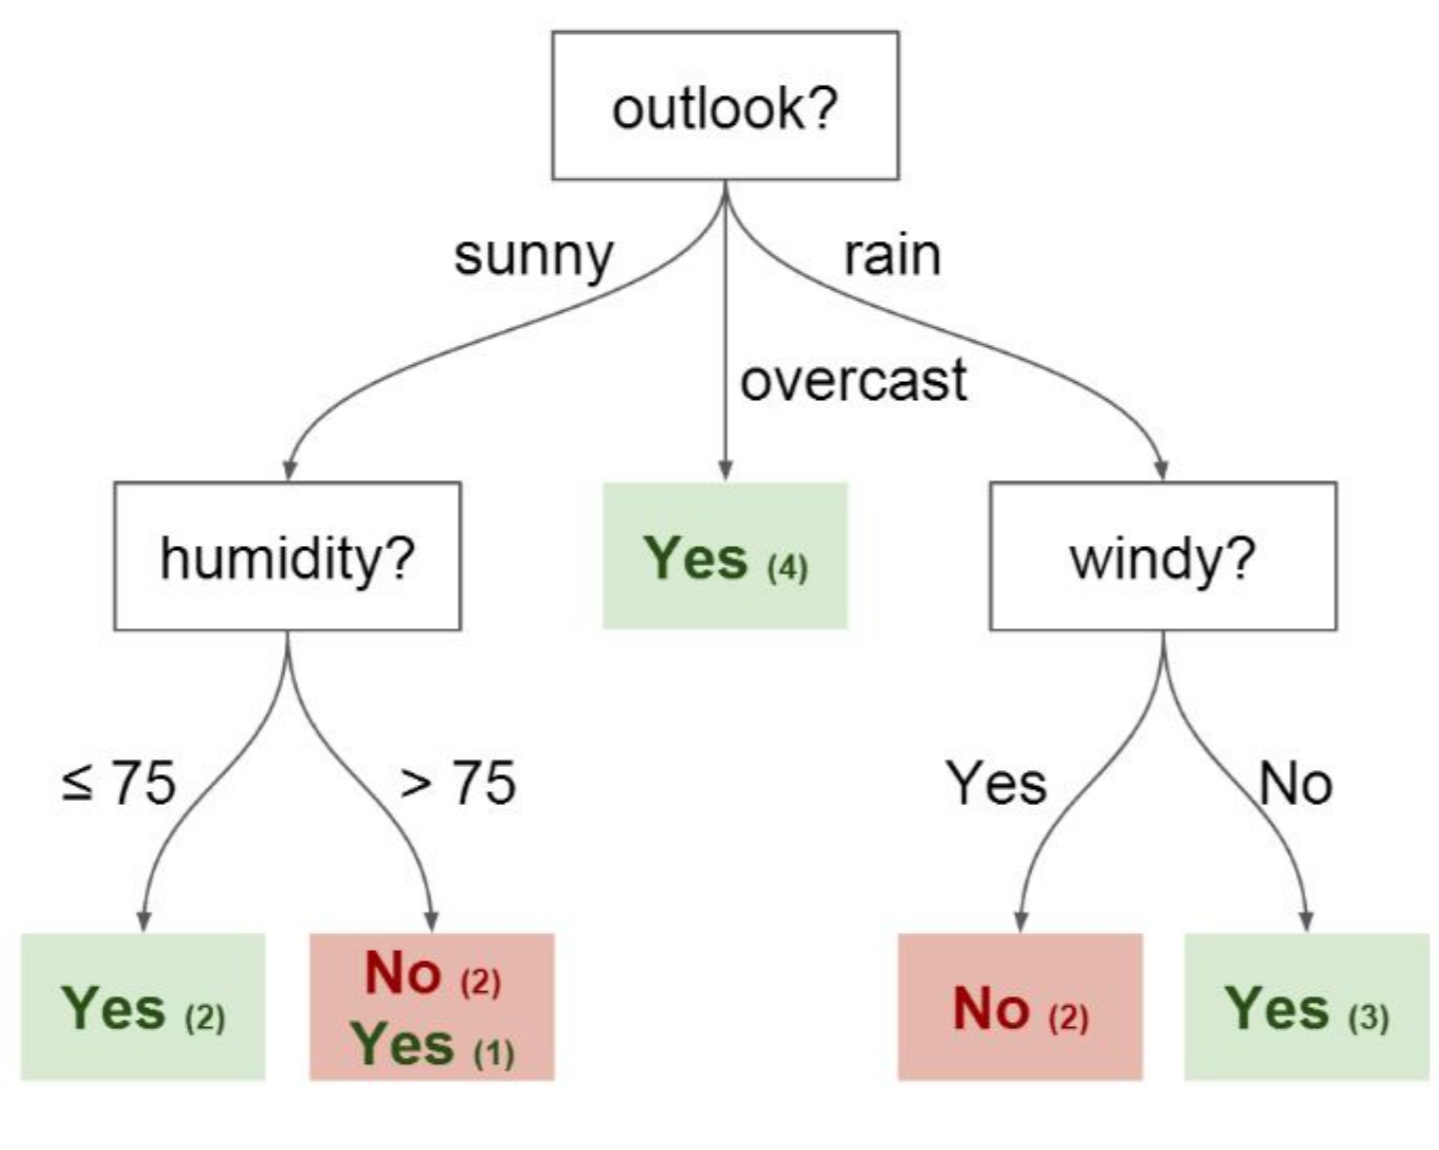

Decision Trees are an important type of algorithm for predictive modeling machine learning.

The classical decision tree algorithms have been around for decades and modern variations like random forest are among the most powerful techniques available.

Classification and Regression Trees or `CART` for short is a term introduced by `Leo Breiman` to refer to Decision Tree algorithms that can be used for classification or regression predictive modeling problems.

Classically, this algorithm is referred to as “`decision trees`”, but on some platforms like R they are referred to by the more modern term CART.

The `CART` algorithm provides a foundation for important algorithms like `bagged decision trees`, `random forest` and `boosted decision trees`.

### CART Model Representation
The representation for the CART model is a binary tree.

This is your binary tree from algorithms and data structures, nothing too fancy. Each root node represents a single input variable (x) and a split point on that variable (assuming the variable is numeric).

The leaf nodes of the tree contain an output variable (y) which is used to make a prediction.

Given a new input, the tree is traversed by evaluating the specific input started at the root node of the tree.

#### Some **advantages** of decision trees are:
* Simple to understand and to interpret. Trees can be visualised.
* Requires little data preparation. 
* Able to handle both numerical and categorical data.
* Possible to validate a model using statistical tests. 
* Performs well even if its assumptions are somewhat violated by the true model from which the data were generated.

#### The **disadvantages** of decision trees include:
* Overfitting. Mechanisms such as pruning (not currently supported), setting the minimum number of samples required at a leaf node or setting the maximum depth of the tree are necessary to avoid this problem.
* Decision trees can be unstable. Mitigant: Use decision trees within an ensemble.
* Cannot guarantee to return the globally optimal decision tree. Mitigant: Training multiple trees in an ensemble learner
* Decision tree learners create biased trees if some classes dominate. Recommendation: Balance the dataset prior to fitting

# 2. Random Forest
Random Forest is one of the most popular and most powerful machine learning algorithms. It is a type of ensemble machine learning algorithm called Bootstrap Aggregation or bagging.
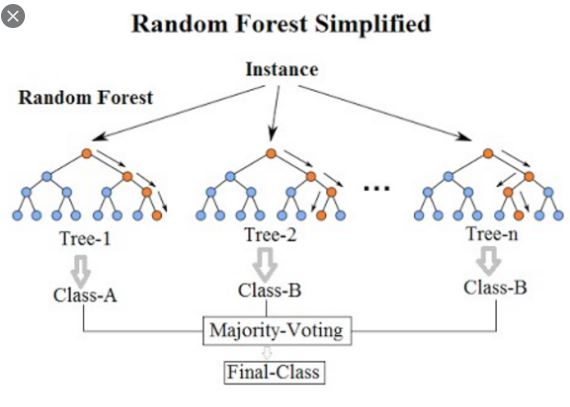
To improve performance of Decision trees, we can use many trees with a random sample of features chosen as the split.

# 3. Decision Tree & Random Forest Implementation in python

We will use Decision Tree & Random Forest in Predicting the attrition of your valuable employees.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

In [2]:
df = pd.read_csv("/kaggle/input/ibm-hr-analytics-attrition-dataset/WA_Fn-UseC_-HR-Employee-Attrition.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


# Exploratory Data Analysis

In [3]:
list(df.columns)

['Age',
 'Attrition',
 'BusinessTravel',
 'DailyRate',
 'Department',
 'DistanceFromHome',
 'Education',
 'EducationField',
 'EmployeeCount',
 'EmployeeNumber',
 'EnvironmentSatisfaction',
 'Gender',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobRole',
 'JobSatisfaction',
 'MaritalStatus',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'Over18',
 'OverTime',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StandardHours',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [5]:
df.describe(include=["object", "bool"])

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,1,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1233,1043,961,606,882,326,673,1470,1054


In [6]:
df["Attrition"].value_counts()

Attrition
No     1233
Yes     237
Name: count, dtype: int64

In [7]:
df["Attrition"].value_counts(normalize=True)

Attrition
No     0.838776
Yes    0.161224
Name: proportion, dtype: float64

In [8]:
# converting from yes , no to 1,0

df["Attrition"]=df.Attrition.astype("category").cat.codes

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   int8  
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [10]:
df["Attrition"].value_counts(normalize=True)

Attrition
0    0.838776
1    0.161224
Name: proportion, dtype: float64

In [11]:
print(df["StandardHours"].describe())

print("--------")

print(df["EmployeeCount"].describe())

print("--------")

print(df["EmployeeNumber"].describe())

print("--------")

print(df["Over18"].describe())



count    1470.0
mean       80.0
std         0.0
min        80.0
25%        80.0
50%        80.0
75%        80.0
max        80.0
Name: StandardHours, dtype: float64
--------
count    1470.0
mean        1.0
std         0.0
min         1.0
25%         1.0
50%         1.0
75%         1.0
max         1.0
Name: EmployeeCount, dtype: float64
--------
count    1470.000000
mean     1024.865306
std       602.024335
min         1.000000
25%       491.250000
50%      1020.500000
75%      1555.750000
max      2068.000000
Name: EmployeeNumber, dtype: float64
--------
count     1470
unique       1
top          Y
freq      1470
Name: Over18, dtype: object


In [12]:
# removing columns that are meaningless

df.drop(["EmployeeCount","EmployeeNumber","Over18", "StandardHours"], axis="columns", inplace=True)

In [13]:
categorical_columns=[]

for col in df.columns:
    if df[col].dtype == object and len(df[col].unique()) <= 50:
        categorical_columns.append(col)


In [14]:
categorical_columns

['BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'OverTime']

In [15]:
# do label encoding provide numbers 

from sklearn.preprocessing import LabelEncoder

label=LabelEncoder()

for column in categorical_columns:
    df[column] = label.fit_transform(df[column])

In [17]:
from sklearn.model_selection import train_test_split

X=df.drop("Attrition", axis="columns")
y=df['Attrition']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [32]:
from sklearn.metrics import accuracy_score, confusion_matrix , classification_report

def print_score(clf, X_train,y_train, X_test, y_test, train=True):
    if train:
        pred= clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n=============================================")
        print(f"Accuracy Score:{accuracy_score(y_train,pred)*100:.2f}%")
        print("============================================================")
        print(f"Classification Report:\n{clf_report}")
        print("============================================================")
        print(f"Confusion Matrix :\n {confusion_matrix(y_train,pred)}\n")
        print("============================================================")
    else:
        pred= clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Train Result:\n=============================================")
        print(f"Accuracy Score:{accuracy_score(y_test,pred)*100:.2f}%")
        print("============================================================")
        print(f"Classification Report:\n{clf_report}")
        print("============================================================")
        print(f"Confusion Matrix :\n {confusion_matrix(y_test,pred)}\n")
        print("============================================================")
    

## Without HPO

In [20]:
from sklearn.tree import DecisionTreeClassifier

tree_clf= DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

In [33]:
print_score(tree_clf, X_train,y_train, X_test,y_test, train=True)
print_score(tree_clf, X_train,y_train, X_test,y_test, train=False)

Train Result:
Accuracy Score:100.00%
Classification Report:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    853.0  176.0       1.0     1029.0        1029.0
Confusion Matrix :
 [[853   0]
 [  0 176]]

Train Result:
Accuracy Score:77.78%
Classification Report:
                    0          1  accuracy   macro avg  weighted avg
precision    0.887363   0.259740  0.777778    0.573551      0.800549
recall       0.850000   0.327869  0.777778    0.588934      0.777778
f1-score     0.868280   0.289855  0.777778    0.579067      0.788271
support    380.000000  61.000000  0.777778  441.000000    441.000000
Confusion Matrix :
 [[323  57]
 [ 41  20]]



## HPO

In [34]:
from sklearn.model_selection import GridSearchCV

params = {
    "criterion":("gini", "entropy"), 
    "splitter":("best", "random"), 
    "max_depth":(list(range(1, 20))), 
    "min_samples_split":[2, 3, 4], 
    "min_samples_leaf":list(range(1, 20)), 
}


tree_clf = DecisionTreeClassifier(random_state=42)
tree_cv = GridSearchCV(
    tree_clf, 
    params, 
    scoring="f1", 
    n_jobs=-1, 
    verbose=1, 
    cv=5
)

tree_cv.fit(X_train, y_train)

Fitting 5 folds for each of 4332 candidates, totalling 21660 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ('gini', 'entropy'),
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19],
                         'min_samples_split': [2, 3, 4],
                         'splitter': ('best', 'random')},
             scoring='f1', verbose=1)

In [35]:
best_params = tree_cv.best_params_
print(f"Best paramters: {best_params})")

Best paramters: {'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 19, 'min_samples_split': 2, 'splitter': 'best'})


In [36]:
tree_clf = DecisionTreeClassifier(**best_params)
tree_clf.fit(X_train, y_train)
print_score(tree_clf, X_train, y_train, X_test, y_test, train=True)
print_score(tree_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score:86.78%
Classification Report:
                    0           1  accuracy    macro avg  weighted avg
precision    0.887568    0.692308  0.867833     0.789938      0.854170
recall       0.962485    0.409091  0.867833     0.685788      0.867833
f1-score     0.923510    0.514286  0.867833     0.718898      0.853516
support    853.000000  176.000000  0.867833  1029.000000   1029.000000
Confusion Matrix :
 [[821  32]
 [104  72]]

Train Result:
Accuracy Score:87.30%
Classification Report:
                    0          1  accuracy   macro avg  weighted avg
precision    0.891304   0.592593  0.873016    0.741948      0.849986
recall       0.971053   0.262295  0.873016    0.616674      0.873016
f1-score     0.929471   0.363636  0.873016    0.646554      0.851204
support    380.000000  61.000000  0.873016  441.000000    441.000000
Confusion Matrix :
 [[369  11]
 [ 45  16]]



In [38]:
from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
import pydot

features = list(df.columns)
features.remove("Attrition")

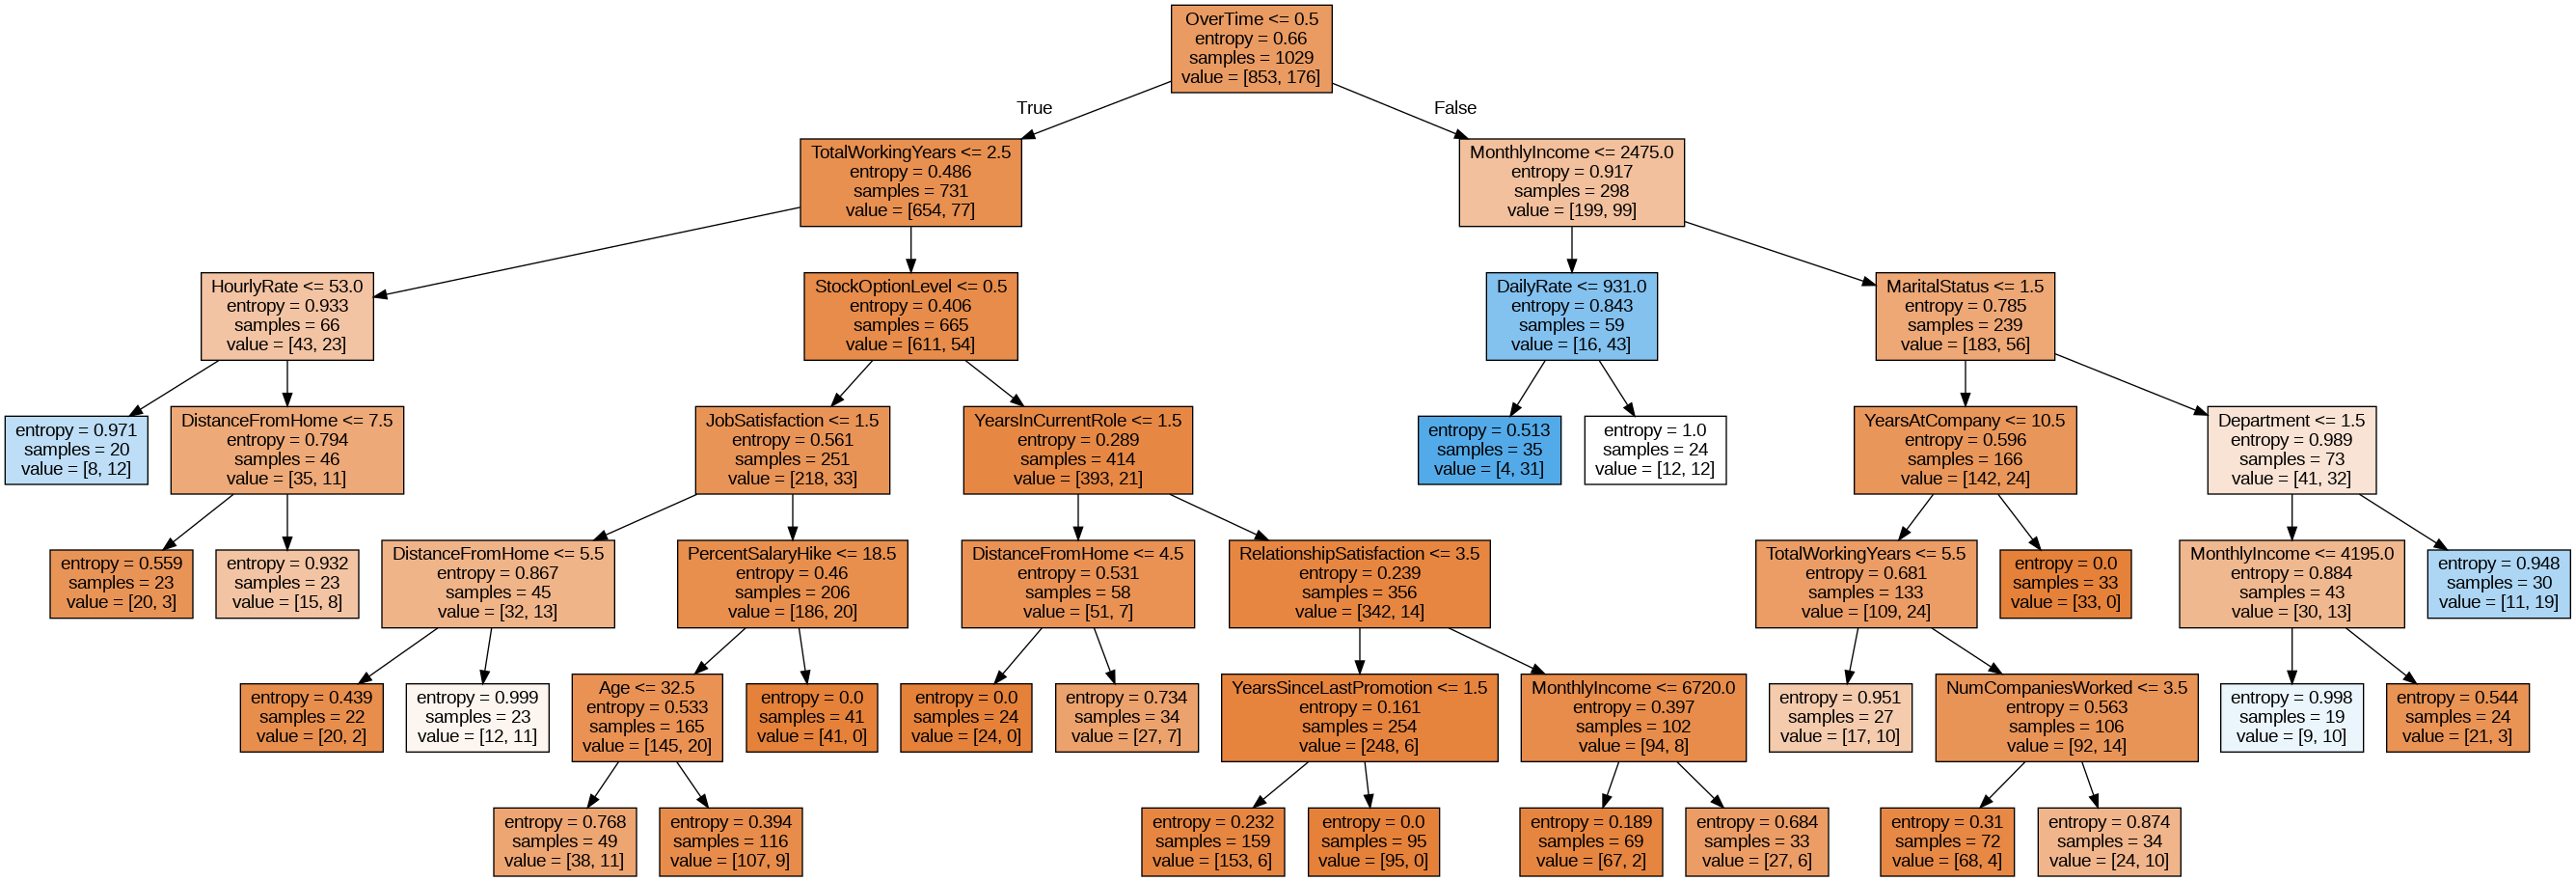

In [39]:
dot_data = StringIO()
export_graphviz(tree_clf, out_file=dot_data, feature_names=features, filled=True)
graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())